RelativeCompactness    0
SurfaceArea            0
WallArea               0
RoofArea               0
OverallHeight          0
Orientation            0
GlazingArea            0
GlazingAreaDist        0
HeatingLoad            0
CoolingLoad            0
dtype: int64


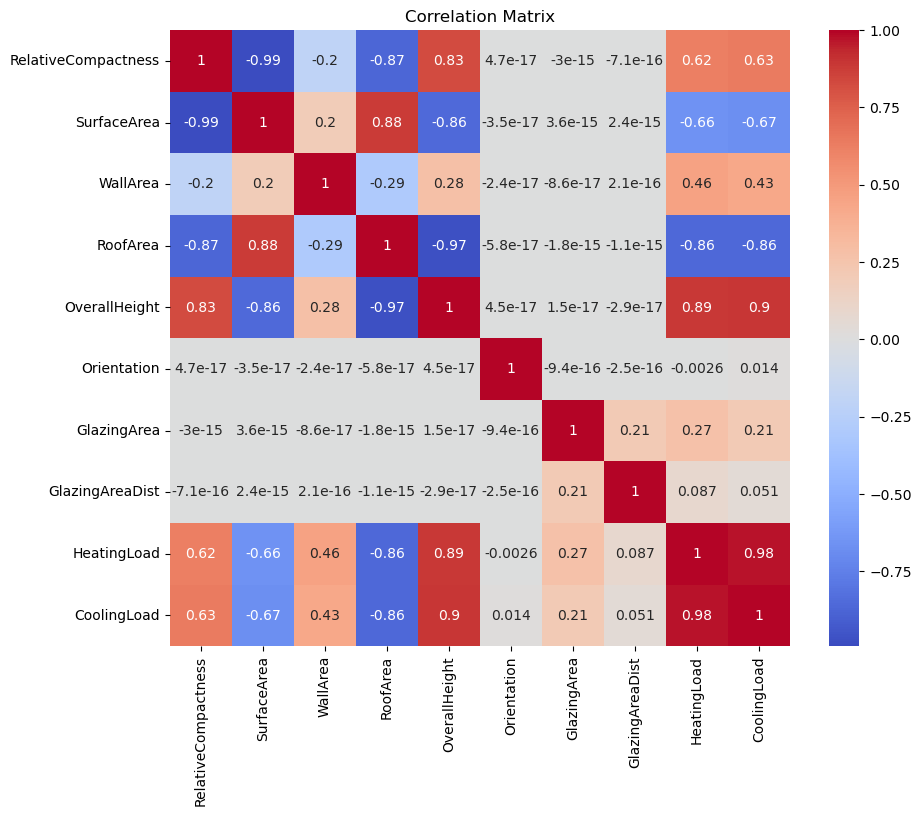

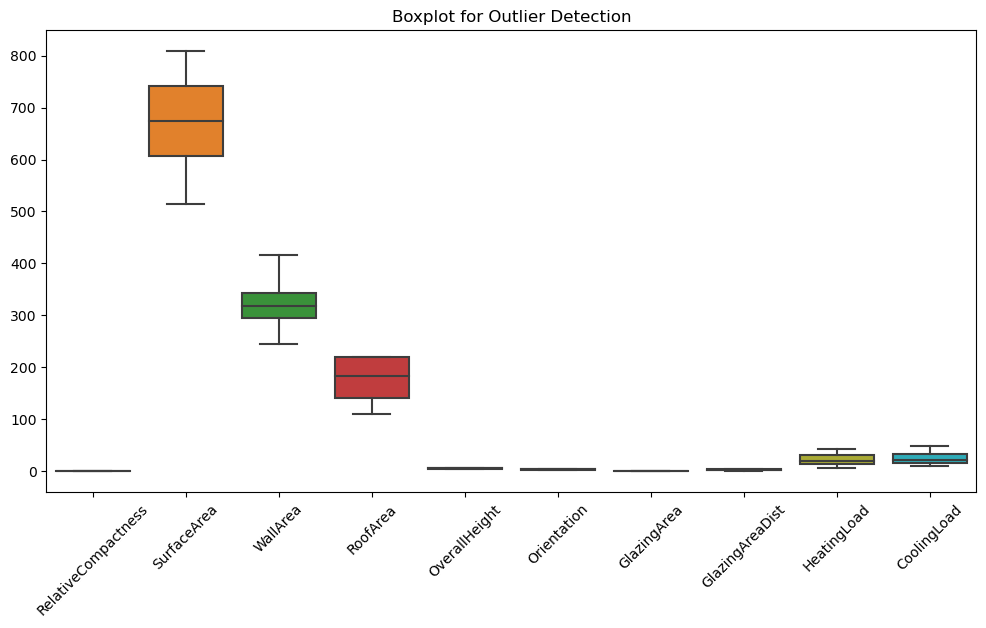

Evaluation Results:
Model: Manual Linear Regression
R2 Score: 0.4279
MSE: 59.6341
RMSE: 7.7223
------------------------------
Model: Sklearn Linear Regression
R2 Score: 0.9122
MSE: 9.1532
RMSE: 3.0254
------------------------------
Model: Ridge Regression
R2 Score: 0.9116
MSE: 9.2142
RMSE: 3.0355
------------------------------
Model: Lasso Regression
R2 Score: 0.9046
MSE: 9.9394
RMSE: 3.1527
------------------------------


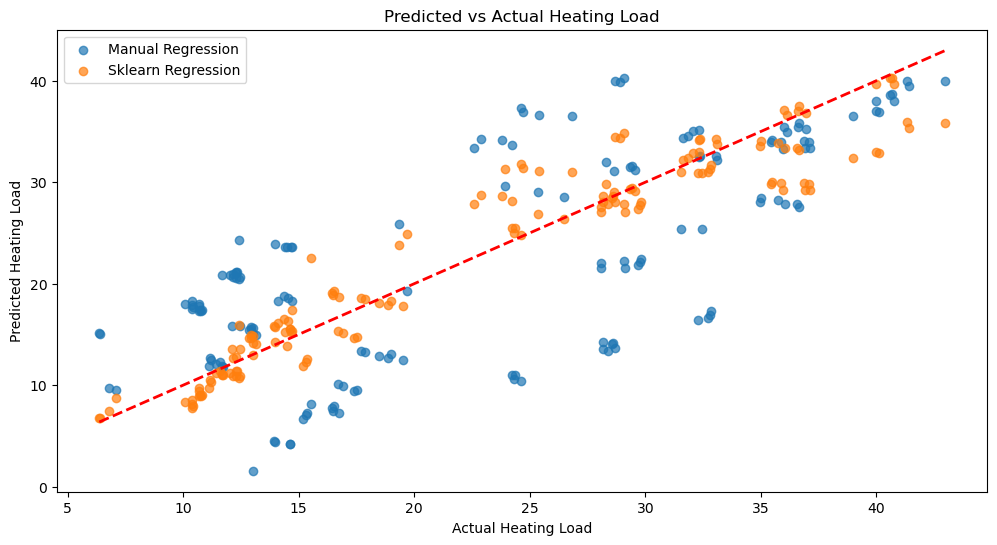

Feature Coefficients from Sklearn Linear Regression:
OverallHeight          7.216421
GlazingArea            2.681740
WallArea               0.808902
GlazingAreaDist        0.327199
Orientation           -0.036268
SurfaceArea           -3.618459
RoofArea              -3.919164
RelativeCompactness   -6.540545
dtype: float64

Suggestions:
- Features like 'Relative Compactness' and 'Overall Height' heavily impact heating load.
- Consider optimizing wall and roof area for better insulation.
- Orientation and glazing area distribution also play significant roles; adjust based on sunlight exposure.


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Rename columns for better understanding
data.columns = ['RelativeCompactness', 'SurfaceArea', 'WallArea', 'RoofArea',
                'OverallHeight', 'Orientation', 'GlazingArea', 'GlazingAreaDist',
                'HeatingLoad', 'CoolingLoad']

# (i) Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-2])  # Exclude target variables

# Create final dataset
X = pd.DataFrame(scaled_data, columns=data.columns[:-2])
y = data['HeatingLoad']

# (ii) Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (iii) Model Training
# Manual Linear Regression
X_train_np = np.hstack((np.ones((X_train.shape[0], 1)), X_train.values))
X_test_np = np.hstack((np.ones((X_test.shape[0], 1)), X_test.values))

# Compute beta coefficients
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

# Manual Predictions
y_pred_manual = X_test_np @ beta

# Sklearn Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# (iv) Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-" * 30)
    return r2, mse, rmse

print("Evaluation Results:")
evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Plot Predicted vs Actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_manual, label="Manual Regression", alpha=0.7)
plt.scatter(y_test, y_pred_lr, label="Sklearn Regression", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")
plt.show()

# (v) Energy Efficiency Suggestions
print("Feature Coefficients from Sklearn Linear Regression:")
feature_importance = pd.Series(lr.coef_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

# Insights for energy efficiency
print("\nSuggestions:")
print("- Features like 'Relative Compactness' and 'Overall Height' heavily impact heating load.")
print("- Consider optimizing wall and roof area for better insulation.")
print("- Orientation and glazing area distribution also play significant roles; adjust based on sunlight exposure.")
